In [1]:
import pandas as pd
import matplotlib.pyplot as plt

source = pd.read_csv("movies.csv")
df = pd.DataFrame(source)

## Number of movies in a year

In [2]:
temp = pd.DataFrame({'year': df['year']})
print(temp.value_counts())

year
2000    200
2002    200
1999    200
1998    200
1997    200
1996    200
1995    200
1994    200
1993    200
1992    200
1991    200
1990    200
1989    200
1988    200
1987    200
1986    200
1985    200
2019    200
2001    200
2012    200
2003    200
2018    200
2017    200
2016    200
2015    200
2014    200
2013    200
2011    200
2010    200
2009    200
2008    200
2007    200
2006    200
2005    200
2004    200
1984    168
1983    144
1982    126
1981    113
1980     92
2020     25
dtype: int64


# Number of movies in particular genre

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Romance        10
Sci-Fi         10
Western         3
Musical         2
Music           1
Sport           1
History         1
Name: genre, dtype: int64


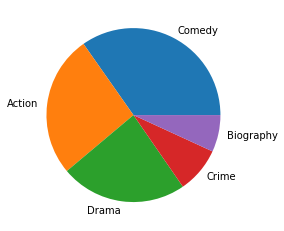

In [4]:
print(df['genre'].value_counts())
plt.pie(x=df['genre'].value_counts().head(5), labels= df['genre'].value_counts().head(5).keys())
plt.show()

# countries vs number of movies released

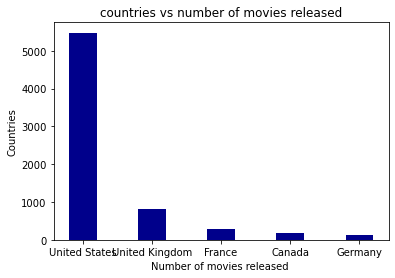

United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Name: country, dtype: int64


In [6]:
plt.bar(df['country'].value_counts().head(5).keys(), df['country'].value_counts().head(5), width=0.4 , color = 'darkblue')
plt.title("countries vs number of movies released")
plt.xlabel("Number of movies released ")
plt.ylabel("Countries")
plt.show()
print(df['country'].value_counts().head(5))

# Category of movies liked by customers based on IMDb score

In [8]:
top_scorers ={}
for i in df['genre'].value_counts().head(5).keys():
    if (i=="Drama"):
        top_scorers["Drama"] = df.query('(score >  8.0 ) & (genre == "Drama")')['name'].count()
    elif (i=="Comedy"):
        top_scorers["Comedy"] = df.query('(score >  8.0 ) & (genre == "Comedy")')['name'].count()
    elif (i=="Action"):
        top_scorers["Action"] = df.query('(score >  8.0 ) & (genre == "Action")')['name'].count()
    elif (i=="Biography"):
        top_scorers["Action"] = df.query('(score >  8.0 ) & (genre == "Biography")')['name'].count()
            
    elif (i=="Crime"):
        top_scorers["Action"] = df.query('(score >  8.0 ) & (genre == "Crime")')['name'].count()

pos = list(top_scorers.values()).index(max(top_scorers.values()))
print("Top scoring category :", list(top_scorers.keys())[pos])


Top scoring category : Drama


# Companies and number of movies released

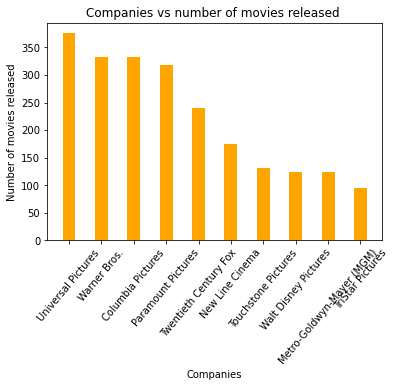

In [96]:
com_movies = (df['company'].value_counts().head(10))
company = list(com_movies.keys())
plt.bar(company, com_movies, width=0.4,color = "orange")
plt.xlabel("Companies")
plt.xticks( rotation = 50)
plt.ylabel("Number of movies released")
plt.title("Companies vs number of movies released ")
plt.show()

## Top Stars vs number of hit movies

In [ ]:
#Top stars
top_stars = df['star'].value_counts().head(10)
a=list(top_stars.keys())

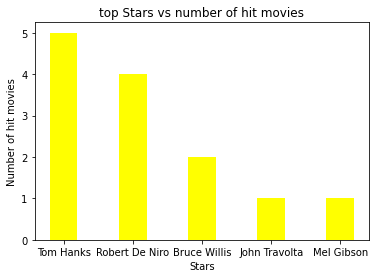

In [69]:
highscorer_stars=[]
hit_movies=[]
for i in a:
        if (df.loc[(df['score']>8.0)&(df['star'] == i),['name']].empty==False):
            highscorer_stars.append(i)
            hit_movies.append(int(df.loc[(df['score']>8.0)&(df['star'] == i),['name']].count()))
plt.bar(highscorer_stars, hit_movies, width=0.4, color="yellow")
plt.title("top Stars vs number of hit movies")
plt.xlabel("Stars")
plt.ylabel("Number of hit movies")
plt.show()

# Highest grossing companies

In [91]:
tot_gross={}
for i in company :
    tot_gross[i] = float(df.loc[(df['company']== i),['gross']].sum())
tot_gross

{'Universal Pictures': 52514188890.0,
 'Warner Bros.': 56491421806.0,
 'Columbia Pictures': 43008941346.0,
 'Paramount Pictures': 40493607415.0,
 'Twentieth Century Fox': 40257053857.0,
 'New Line Cinema': 19883797684.0,
 'Touchstone Pictures': 11795832638.0,
 'Metro-Goldwyn-Mayer (MGM)': 9230230105.0,
 'Walt Disney Pictures': 36327887792.0,
 'TriStar Pictures': 5667436463.0}

<function matplotlib.pyplot.show(close=None, block=None)>

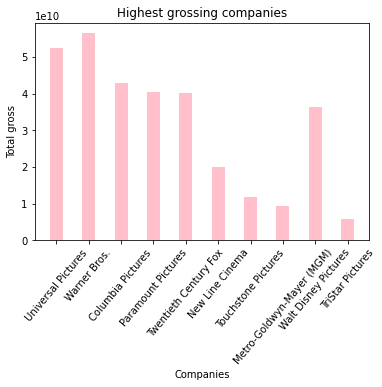

In [93]:
plt.bar(tot_gross.keys() , tot_gross.values() , width=0.4, color="pink")
plt.title("Highest grossing companies")
plt.xlabel("Companies")
plt.xticks( rotation = 50)
plt.ylabel("Total gross")
plt.show

## Top writers

In [108]:
#Number of movies each writer has written
writer = dict(df['writer'].value_counts().head(10))
writer

{'Woody Allen': 37,
 'Stephen King': 31,
 'Luc Besson': 25,
 'John Hughes': 25,
 'David Mamet': 15,
 'William Shakespeare': 15,
 'Joel Coen': 13,
 'Pedro Almodóvar': 13,
 'Wes Craven': 12,
 'Michael Crichton': 11}

In [115]:
# Writers and number movies having score >8 written
for i in writer.keys():
    print(i," : ",int(df.loc[(df['writer']==i)&(df['score']> 8.0)]['name'].count()))

Woody Allen  :  0
Stephen King  :  4
Luc Besson  :  1
John Hughes  :  0
David Mamet  :  0
William Shakespeare  :  0
Joel Coen  :  1
Pedro Almodóvar  :  0
Wes Craven  :  0
Michael Crichton  :  1
